### import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline 

### read in data

In [2]:
orders = pd.read_csv('product_orders.csv', parse_dates=['period'], index_col=['period','product_sku'])
orders.sort_index(level=(0,1)).head()

orders
period     product_sku        
2019-01-01 widget-a        881
           widget-b        628
           widget-c        449
2019-02-01 widget-a        541
           widget-b        599

### visualize data (optional)

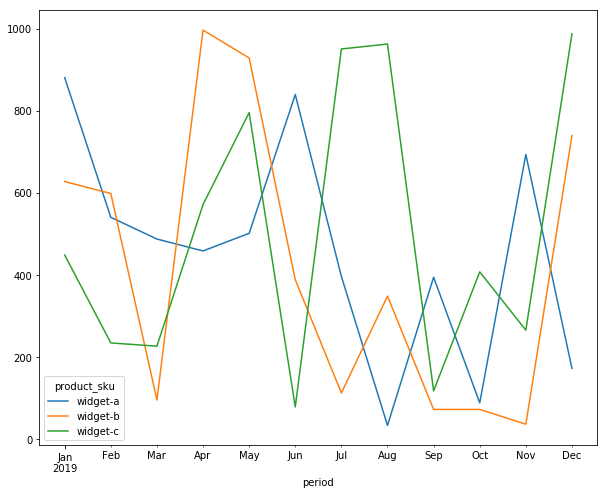

In [3]:
plot = orders['orders'].unstack().plot(y=['widget-a','widget-b','widget-c'], figsize=(10,8))
fig = plot.get_figure()

### add month number as a column

In [4]:
orders['month_num'] = orders.index.get_level_values(0).month
orders.head(3)

orders  month_num
period     product_sku                   
2019-01-01 widget-a        881          1
2019-02-01 widget-a        541          2
2019-03-01 widget-a        488          3

### extract your starting index for each product

In [5]:
baseline = orders[orders.month_num==1]
baseline.reset_index(inplace=True)
del baseline['period']
del baseline['month_num']
baseline.head(3)

product_sku  orders
0    widget-a     881
1    widget-b     628
2    widget-c     449

### combine dataframes for index calc

In [6]:
df = orders.reset_index().merge(baseline, how='inner', on='product_sku', suffixes=('_actual','_baseline'))
df['index'] = df['orders_actual'] / df['orders_baseline']
index = df[['period','month_num','product_sku','index']].copy()
index.head()

period  month_num product_sku     index
0 2019-01-01          1    widget-a  1.000000
1 2019-02-01          2    widget-a  0.614075
2 2019-03-01          3    widget-a  0.553916
3 2019-04-01          4    widget-a  0.520999
4 2019-05-01          5    widget-a  0.569807

### introduce next year's first month actuals or estimate to get remaining forecast
#### (e.g. next year's Jan Orders are: widget-a = 1235, widget-b=980, widget-c=2100) 

In [7]:
# set your month 1 values as variables
wa_month1, wb_month1, wc_month1 = 1235, 980, 2100

### compute product forecasts

In [8]:
widget_a_forecasts = index[df.product_sku=='widget-a'].copy()
widget_a_forecasts['period'] = widget_a_forecasts['period'] + pd.DateOffset(years=1)
widget_a_forecasts['order_forecast_plan'] = (widget_a_forecasts['index'] * wa_month1).round(0)
widget_a_forecasts

period  month_num product_sku     index  order_forecast_plan
0  2020-01-01          1    widget-a  1.000000               1235.0
1  2020-02-01          2    widget-a  0.614075                758.0
2  2020-03-01          3    widget-a  0.553916                684.0
3  2020-04-01          4    widget-a  0.520999                643.0
4  2020-05-01          5    widget-a  0.569807                704.0
5  2020-06-01          6    widget-a  0.953462               1178.0
6  2020-07-01          7    widget-a  0.450624                557.0
7  2020-08-01          8    widget-a  0.038593                 48.0
8  2020-09-01          9    widget-a  0.448354                554.0
9  2020-10-01         10    widget-a  0.101022                125.0
10 2020-11-01         11    widget-a  0.787741                973.0
11 2020-12-01         12    widget-a  0.196368                243.0

#### practice doing the same for the other 2 products